In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [3]:
calories = pd.read_csv('calories.csv') 
exercise=pd.read_csv('exercise.csv')
exercise.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


#### Dataset  Understanding

In [4]:
df=exercise.merge(calories,on='User_ID')

In [5]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


## Data Preprocessing

#### Data Visualization

<Axes: xlabel='Gender', ylabel='count'>

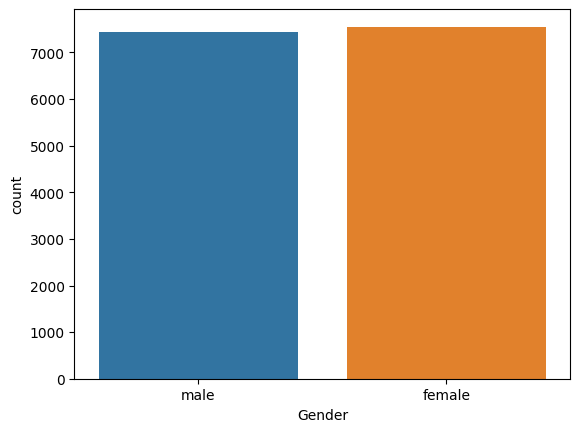

In [8]:
sns.countplot(x='Gender',data=df)

we can observe that male and female are nearly equal

<Axes: xlabel='Age', ylabel='Count'>

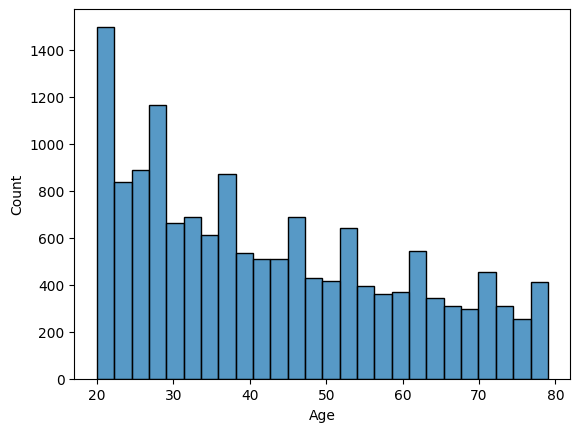

In [20]:
sns.histplot(x='Age',data=df)

majority people lies between 20-30 age

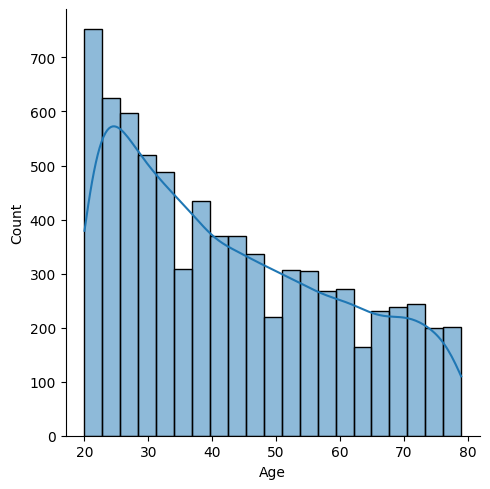

In [19]:
sns.displot(df[df['Gender']=='male']['Age'],kde=True)


#### Data Wrangling

In [9]:
#dropping unimportant column
df.drop(columns='User_ID',inplace=True)

In [12]:
#encoding
df['Gender']=df['Gender'].map({'male':1, 'female':0})

#### x & y

In [13]:
X=df.drop(columns='Calories',axis=1)
y=df['Calories']

#### Train-Test-Split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modelling and Evaluation

In [18]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [21]:
models={
'lr':LinearRegression(),
 'ls':Lasso(),
 'Rd':Ridge(),
 'dt':DecisionTreeRegressor(),
 'rf':RandomForestRegressor(),
}

for name,mod in models.items():
    mod.fit(X_train,y_train)
    ypred_train=mod.predict(X_train)
    ypred_test=mod.predict(X_test)

    print(f'{name}: train score:{r2_score(y_train,ypred_train)}, test score:{r2_score(y_test,ypred_test)}, MSE: {mean_squared_error(y_test,ypred_test)}')
    

lr: train score:0.9671621074066676, test score:0.9672937151257295, MSE: 131.99574575081704
ls: train score:0.9643241573753268, test score:0.9643621590908396, MSE: 143.82689461175073
Rd: train score:0.9671621024278787, test score:0.9672935879435945, MSE: 131.9962590313935
dt: train score:1.0, test score:0.9931287331975032, MSE: 27.731
rf: train score:0.9996947602593993, test score:0.9982428274586297, MSE: 7.091581966666665


In [24]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
ypred=rf.predict(X_test)

import pickle
pickle.dump(rf,open('rf_model.pkl','wb'))
X_train.to_csv('X_train.csv')